# Data Preprocessing

Importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loding data

In [3]:
# Loading the dataset
data = pd.read_csv("Civilian_Complaint_Review_Board__Police_Officers_20240507.csv")

# Data Exploration

In [4]:
#Displaying column names
data.columns

Index(['As Of Date', 'Tax ID', 'Active Per Last Reported Status',
       'Last Reported Active Date', 'Officer First Name', 'Officer Last Name',
       'Officer Race', 'Officer Gender', 'Current Rank Abbreviation',
       'Current Rank', 'Current Command', 'Shield No', 'Total Complaints',
       'Total Substantiated Complaints'],
      dtype='object')

In [5]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90656 entries, 0 to 90655
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   As Of Date                       90656 non-null  object 
 1   Tax ID                           90656 non-null  int64  
 2   Active Per Last Reported Status  90656 non-null  object 
 3   Last Reported Active Date        90656 non-null  object 
 4   Officer First Name               90656 non-null  object 
 5   Officer Last Name                90656 non-null  object 
 6   Officer Race                     90656 non-null  object 
 7   Officer Gender                   90636 non-null  object 
 8   Current Rank Abbreviation        90656 non-null  object 
 9   Current Rank                     90656 non-null  object 
 10  Current Command                  90656 non-null  object 
 11  Shield No                        90598 non-null  float64
 12  Total Complaints  

In [6]:
#displaying few rows
data.head()

,As Of Date,Tax ID,Active Per Last Reported Status,Last Reported Active Date,Officer First Name,Officer Last Name,Officer Race,Officer Gender,Current Rank Abbreviation,Current Rank,Current Command,Shield No,Total Complaints,Total Substantiated Complaints
0,05/06/2024,973066,Yes,05/01/2024 09:57:12 AM,Tyler,Calhoun,White,Male,PO,Police Officer,075 PCT,26598.0,0,0
1,05/06/2024,972846,Yes,05/01/2024 09:57:12 AM,Joseph,Pacifico,White,Male,PO,Police Officer,052 PCT,4577.0,1,0
2,05/06/2024,862530,No,02/08/2001 06:12:23 PM,Donald,Poliseno,White,Male,LT,Lieutenant,068 DET,0.0,0,0
3,05/06/2024,951650,Yes,05/01/2024 09:57:12 AM,Noel,Damico,White,Male,DT3,Detective,075 DET,6188.0,4,1
4,05/06/2024,964499,Yes,05/01/2024 09:57:12 AM,Nicholas,Tangredi,White,Male,PO,Police Officer,019 PCT,6951.0,2,0


In [7]:
#shape of data
data.shape

(90656, 14)

In [8]:
#Null values count
null_counts = data.isnull().sum()
print(null_counts)

As Of Date                          0
Tax ID                              0
Active Per Last Reported Status     0
Last Reported Active Date           0
Officer First Name                  0
Officer Last Name                   0
Officer Race                        0
Officer Gender                     20
Current Rank Abbreviation           0
Current Rank                        0
Current Command                     0
Shield No                          58
Total Complaints                    0
Total Substantiated Complaints      0
dtype: int64


There are Null values in Office Gender and Shield No

# Data Cleaning

In [9]:
# Filling missing vals of 'Officer Gender'and 'Shield No' values with the mode
gender_mode = data['Officer Gender'].mode()[0]
data['Officer Gender'] = data['Officer Gender'].fillna(gender_mode)

mode_shield_no = data['Shield No'].mode()[0]  
data['Shield No'] = data['Shield No'].fillna(mode_shield_no)

In [10]:
data.shape #displaying data shape

(90656, 14)

In [11]:
# Convert 'As Of Date' and 'Last Reported Active Date' to datetime format
data['As Of Date'] = pd.to_datetime(data['As Of Date'])
data['Last Reported Active Date'] = pd.to_datetime(data['Last Reported Active Date'])

In [12]:
#checking null values 
null_counts = data.isnull().sum()
print(null_counts)

As Of Date                         0
Tax ID                             0
Active Per Last Reported Status    0
Last Reported Active Date          0
Officer First Name                 0
Officer Last Name                  0
Officer Race                       0
Officer Gender                     0
Current Rank Abbreviation          0
Current Rank                       0
Current Command                    0
Shield No                          0
Total Complaints                   0
Total Substantiated Complaints     0
dtype: int64


There are no null values in the data

In [13]:
# Check unique values for categorical columns
print("\nUnique values for categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")


Unique values for categorical columns:
Active Per Last Reported Status: ['Yes' 'No']
Officer First Name: ['Tyler' 'Joseph' 'Donald' ... 'Keshia' 'Aiman' 'Prescilo']
Officer Last Name: ['Calhoun' 'Pacifico' 'Poliseno' ... 'Dutton' 'Nason' 'Sibal']
Officer Race: ['White' 'Asian' 'Black' 'Hispanic' 'American Indian' 'Other Race']
Officer Gender: ['Male' 'Female' 'TGNC / Other']
Current Rank Abbreviation: ['PO' 'LT' 'DT3' 'POM' 'CPT' 'DT2' 'SGT' 'POF' 'SDS' 'DT1' 'SGT SA' 'DTS'
 'LCD' 'SGT DS' 'LT CD' 'INS' 'DC' 'LSA' 'AC' 'DI' 'SSA' 'INSP' 'LT SA'
 'PSA' 'CD' 'CTB' 'CHIEF' 'SRG' 'SURG' 'DC SURG' 'CBN' 'COT' 'COP' 'COC'
 'CCA' 'CS' 'COD' 'CTR' 'CPB' 'DCS' 'SV CH SURG' 'CIA' 'COH' 'CMS' 'CSO'
 'ASCS' 'CSI' 'COB' 'CMA' 'CCT' 'CCP']
Current Rank: ['Police Officer' 'Lieutenant' 'Detective' 'Captain' 'Sergeant'
 'Inspector' 'Chiefs and other ranks' 'Deputy Inspector' 'Inactive Ranks']
Current Command: ['075 PCT' '052 PCT' '068 DET' ... 'OFF PROF SB' 'DBCR Z1' 'DBSI VIDEO']


In [14]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Officer Race'] = label_encoder.fit_transform(data['Officer Race'])
data['Officer Gender'] = label_encoder.fit_transform(data['Officer Gender'])
data['Current Rank Abbreviation'] = label_encoder.fit_transform(data['Current Rank Abbreviation'])
data['Current Command'] = label_encoder.fit_transform(data['Current Command'])

# Correlation Heatmap

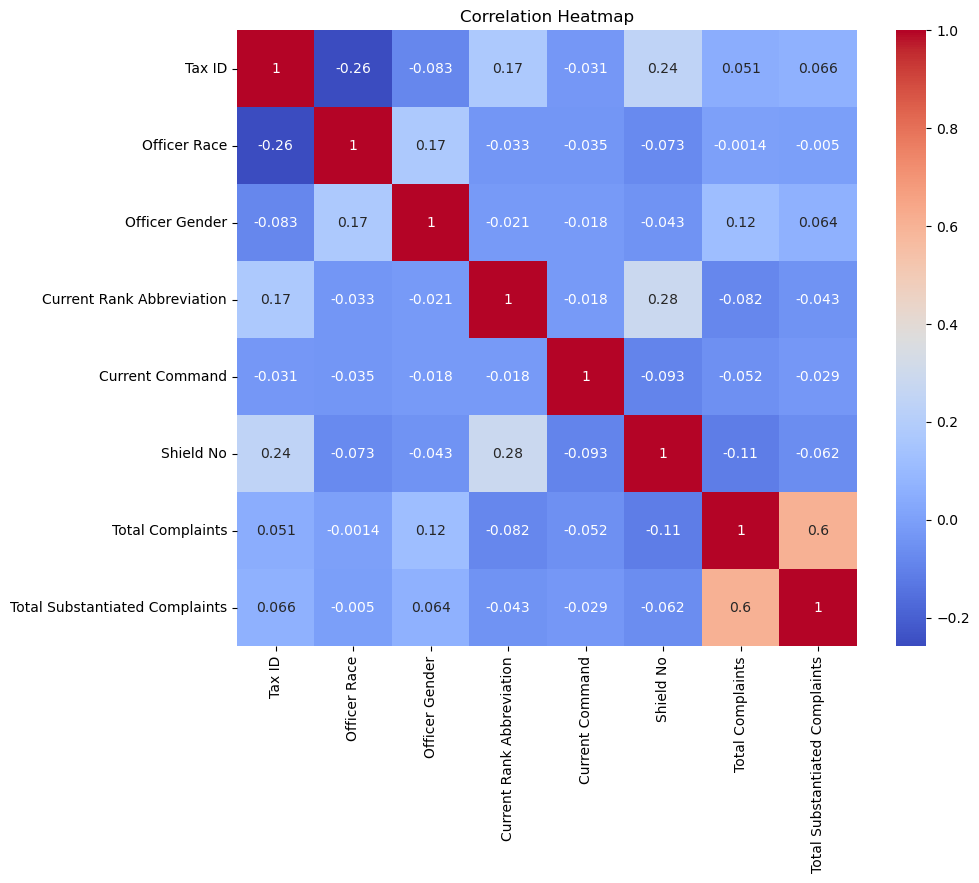

In [15]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Visualizing correlations between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualizations

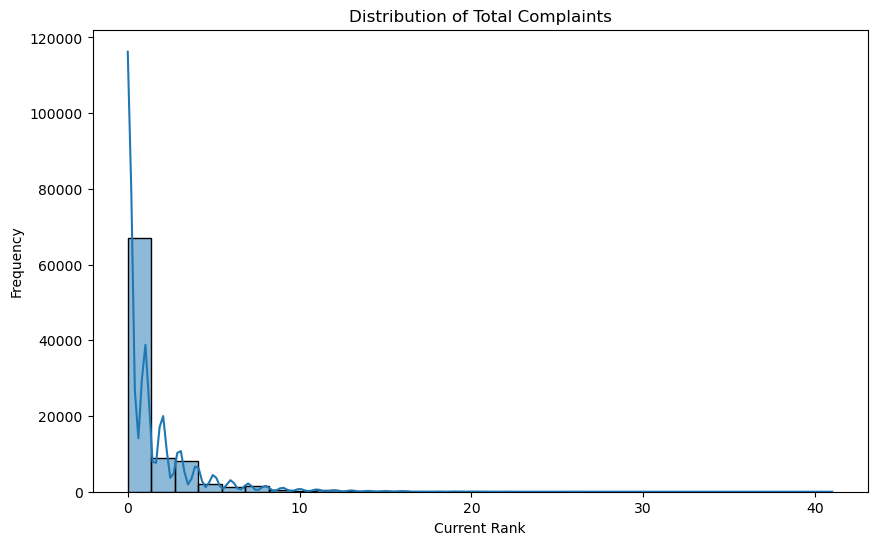

In [16]:
# Histogram of Total Complaints
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Complaints'], bins=30, kde = True)
plt.title('Distribution of Total Complaints') #analysis of total complaints
plt.xlabel('Current Rank')
plt.ylabel('Frequency')
plt.show()

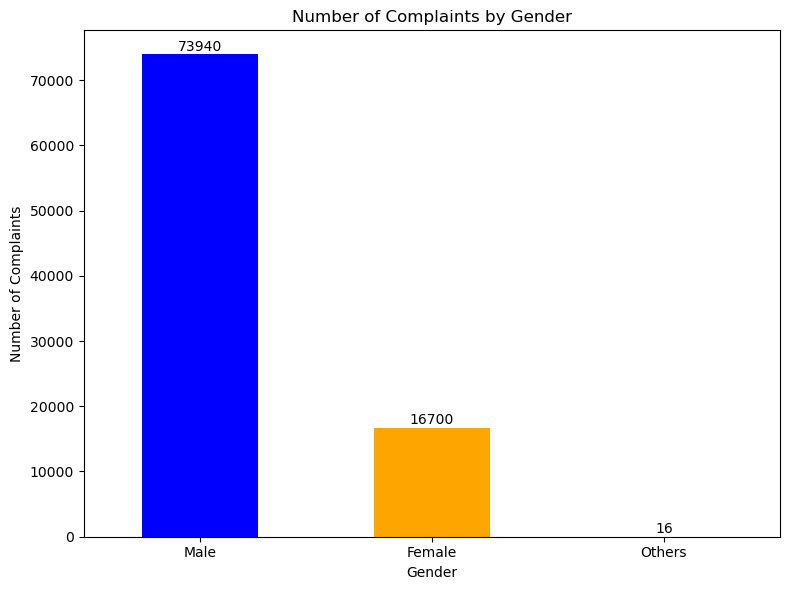

In [17]:
#No. of complaints by gender
#Grouping the data by gender and counting the no. of complaints for each gender
complaints_by_gender = data['Officer Gender'].value_counts()

# x-axis labels
x_labels = ['Male', 'Female', 'Others']

# Plotting
plt.figure(figsize=(8, 6))
complaints_by_gender.plot(kind='bar', color=["blue", "orange"])
plt.title('Number of Complaints by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Complaints')
plt.xticks(range(len(x_labels)), x_labels, rotation=0)

# Annotate the bars with the counts
for i, count in enumerate(complaints_by_gender):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

There are more no. of complaints on Male than female

In [18]:
#average_complaints_per_person = data['Total Complaints'].sum() / data['Tax ID'].nunique()
avg_complaints_per_officer = data.groupby(['Current Rank', 'Shield No']).size().groupby('Current Rank').mean()
print("Average complaints per person:", avg_complaints_per_officer)

Average complaints per person: Current Rank
Captain                   1047.000000
Chiefs and other ranks       5.390244
Deputy Inspector           426.000000
Detective                    2.280952
Inactive Ranks              70.000000
Inspector                  347.000000
Lieutenant                5390.000000
Police Officer               1.917828
Sergeant                     2.224486
dtype: float64


Analysing Complaints by Department

In [19]:
# Group the data by department and count the number of complaints for each department
dept_complaints = data.groupby('Current Rank').size()

# Find the department(s) with the most number of complaints
max_complaints_dept = dept_complaints.idxmax()  # Get the department with the maximum number of complaints
max_complaints_count = dept_complaints[max_complaints_dept]  # Get the maximum number of complaints

# least number of complaints
min_complaints_dept = dept_complaints.idxmin()  
min_complaints_count = dept_complaints.min()

print(f"The department with the most number of complaints is '{max_complaints_dept}' with {max_complaints_count} complaints.")
print(f"The department with the least number of complaints is '{min_complaints_dept}' with {min_complaints_count} complaints.")


The department with the most number of complaints is 'Police Officer' with 53680 complaints.
The department with the least number of complaints is 'Inactive Ranks' with 70 complaints.


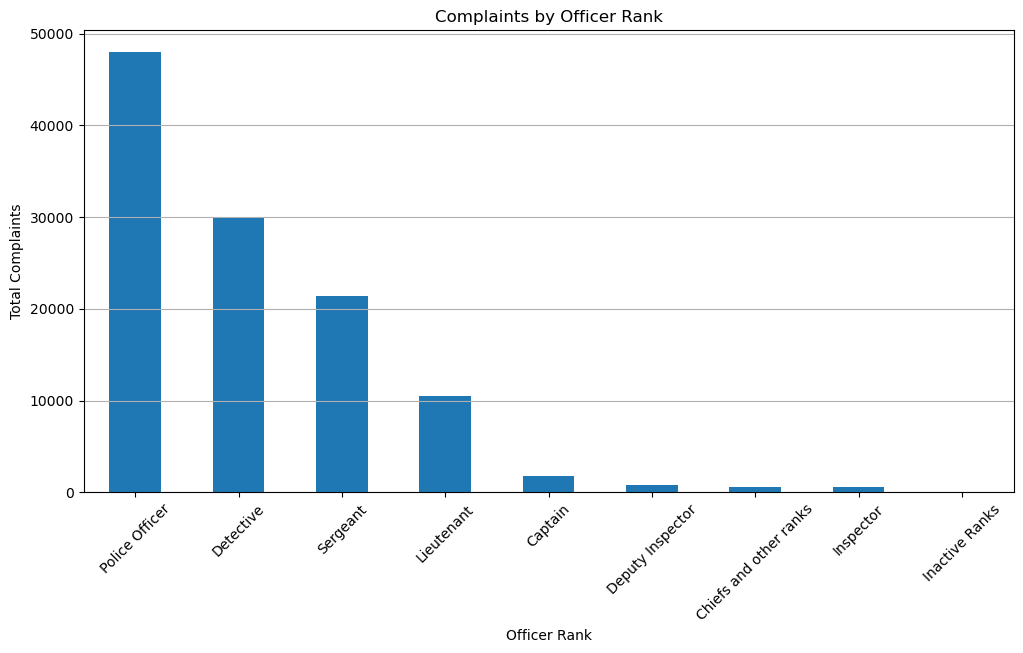

In [20]:
# Count complaints by officer rank
complaints_by_rank = data.groupby('Current Rank')['Total Complaints'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
complaints_by_rank.plot(kind='bar')
plt.title('Complaints by Officer Rank')
plt.xlabel('Officer Rank')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Complaints on Police officer is higher than other departments

In [21]:
#common categories of complaints
common_complaints = data['Current Rank'].value_counts().head(10)
print("Top 10 common categories of complaints:")
print(common_complaints)

Top 10 common categories of complaints:
Current Rank
Police Officer            53680
Detective                 17244
Sergeant                  12010
Lieutenant                 5390
Captain                    1047
Chiefs and other ranks      442
Deputy Inspector            426
Inspector                   347
Inactive Ranks               70
Name: count, dtype: int64


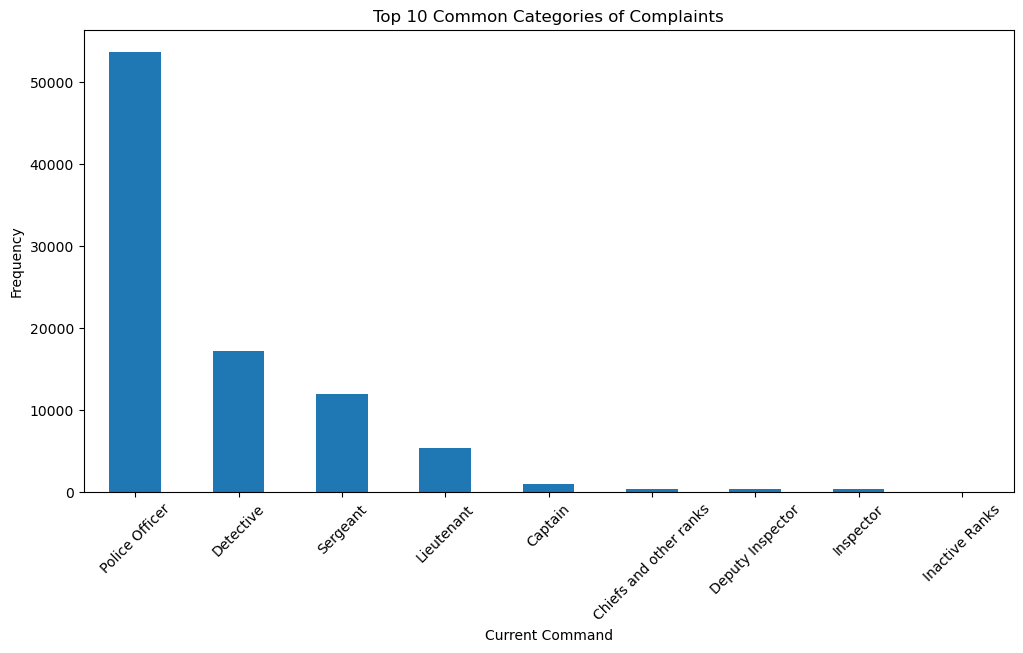

In [22]:
# Visualization of common categories of complaints
plt.figure(figsize=(12, 6))
common_complaints.plot(kind='bar')
plt.title('Top 10 Common Categories of Complaints')
plt.xlabel('Current Command')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Highest Complaints
highest_complaints = data.sort_values(by='Total Complaints', ascending=False).head(10)
print("Officers with the highest number of complaints:")
print(highest_complaints[['Officer First Name', 'Officer Last Name', 'Total Complaints']])

Officers with the highest number of complaints:
      Officer First Name Officer Last Name  Total Complaints
88562              David            Grieco                41
7682              Robert          Martinez                40
82801              David           Terrell                37
27333            Timothy          Brovakos                35
47278              Kevin            Martin                34
16974             Mathew             Reich                33
68949             Dennis            Ferber                32
12948              Henry           Daverin                31
35168             Daniel            Sbarra                30
67909          Alexander              Bobo                29


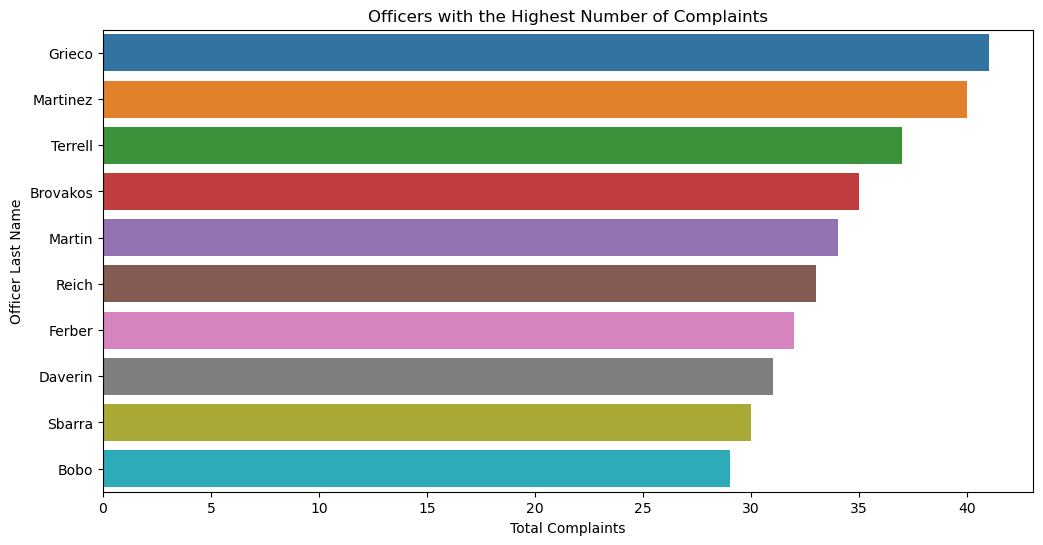

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Complaints', y='Officer Last Name', data=highest_complaints)
plt.title('Officers with the Highest Number of Complaints')
plt.xlabel('Total Complaints')
plt.ylabel('Officer Last Name')
plt.show()

In [25]:
# Lowest Complaints
lowest_complaints = data[data['Total Complaints'] > 0].sort_values(by='Total Complaints').head(10)
print("\nOfficers with the lowest number of complaints:")
print(lowest_complaints[['Officer First Name', 'Officer Last Name', 'Total Complaints']])


Officers with the lowest number of complaints:
      Officer First Name Officer Last Name  Total Complaints
1                 Joseph          Pacifico                 1
47890           Davidson            Fleary                 1
47889             Javier          Montalvo                 1
47886          Christina             Haber                 1
47877            Jeffrey           Shultis                 1
47868             Adrian           Dejesus                 1
47859             Carlos           Pizarro                 1
47854            Haroldy           Cabreja                 1
47841            Gregory           Perpall                 1
47833             Joseph           Altieri                 1


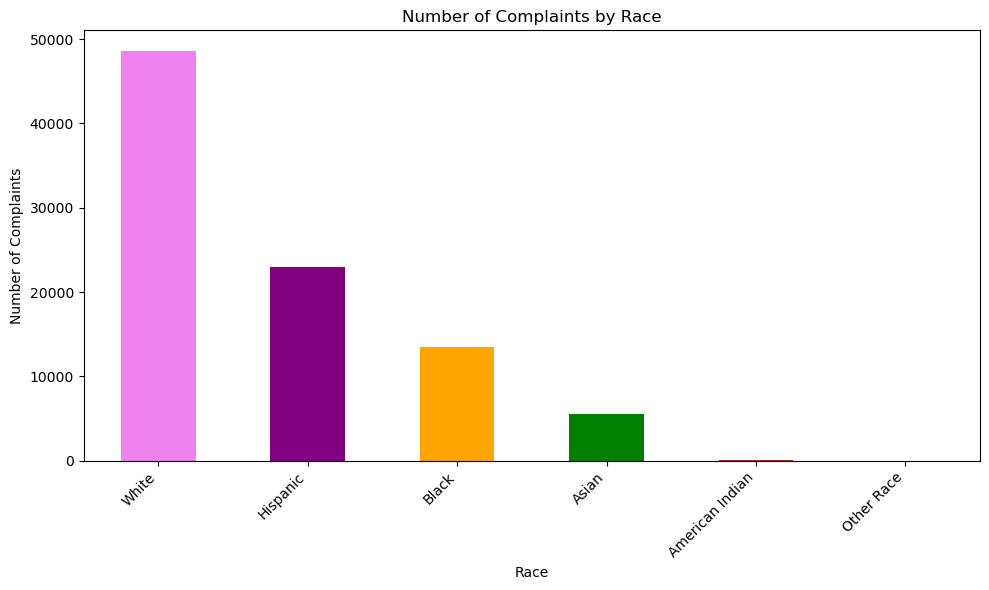

In [26]:
races = ["White", "Hispanic", "Black", "Asian", "American Indian", "Other Race"] # Defining custom race labels

complaints_by_race = data['Officer Race'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
complaints_by_race.plot(kind='bar', color = ["violet", "purple","orange", "green", "brown", "yellow"])
plt.title('Number of Complaints by Race')
plt.xlabel('Race')
plt.ylabel('Number of Complaints')
plt.xticks(range(len(races)), races, rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

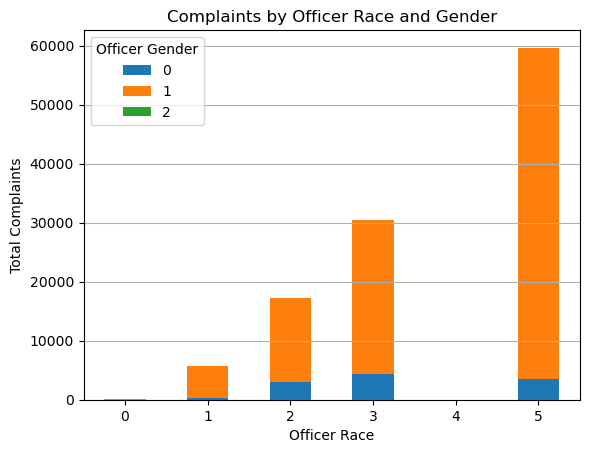

In [27]:
# Count complaints by officer race and gender
complaints_by_race_gender = data.groupby(['Officer Race', 'Officer Gender'])['Total Complaints'].sum().unstack()
# Plotting
plt.figure(figsize=(10, 6))
complaints_by_race_gender.plot(kind='bar', stacked=True)
plt.title('Complaints by Officer Race and Gender')
plt.xlabel('Officer Race')
plt.ylabel('Total Complaints')
plt.xticks(rotation=0)
plt.legend(title='Officer Gender')
plt.grid(axis='y')
plt.show()

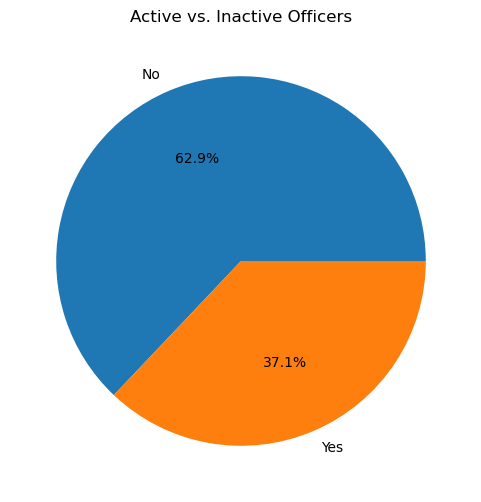

In [28]:
# Count active vs. inactive officers
active_inactive_counts = data['Active Per Last Reported Status'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
active_inactive_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Active vs. Inactive Officers')
plt.ylabel('')
plt.show()

# Model Training and Evaluation

In [29]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from math import sqrt

In [30]:
# Selecting columns that are of type datetime64
date_columns = data.select_dtypes(include=['datetime64']).columns

for col in date_columns: #iterating over datetime column
    # Converting datetime to a numeric feature
    data[col] = pd.to_datetime(data[col]).dt.year 

In [31]:
# Encoding categorical columns
encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = encoder.fit_transform(data[column]) #encoding categorical vars to numerical 


X = data.drop(['Total Substantiated Complaints','Officer First Name','Officer Last Name'], axis=1)
y = data['Total Substantiated Complaints'] > 0  #target variable

X = pd.get_dummies(X, drop_first=True) #converting categorical variables into dummy

In [32]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [33]:
# shapes of the split data
(X_train.shape, X_valid.shape, X_test.shape)

((58019, 11), (14505, 11), (18132, 11))

# Logistic Regression

In [34]:
lr_model = LogisticRegression(max_iter=1000) # Initializing the model
lr_model.fit(X_train, y_train) #fitting model to training data
lr_probabilities = lr_model.predict_proba(X_valid) #probabilities on val dataset
lr_predictions = (lr_probabilities[:, 1] > 0.5).astype(int)

#calculating accuracy, confusion matrix,and classification report
lr_accuracy = accuracy_score(y_valid, lr_predictions)
lr_conf_matrix = confusion_matrix(y_valid, lr_predictions)
report = classification_report(y_valid, lr_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
lr_mse = mean_squared_error(y_valid, lr_predictions)
lr_rmse = sqrt(lr_mse)
lr_r2 = r2_score(y_valid, lr_predictions)

#printing
print("Logistic Regression Evaluation")
print("Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", lr_conf_matrix)
df_report

Logistic Regression Evaluation
Accuracy: 0.9185108583247156
Confusion Matrix:
 [[12966   217]
 [  965   357]]


,precision,recall,f1-score,support
False,0.930730,0.983539,0.956406,13183.000000
True,0.621951,0.270045,0.376582,1322.000000
accuracy,0.918511,0.918511,0.918511,0.918511
macro avg,0.776341,0.626792,0.666494,14505.000000
weighted avg,0.902588,0.918511,0.903561,14505.000000


In [35]:
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R-squared (R2):", lr_r2)

Mean Squared Error (MSE): 0.08148914167528439
Root Mean Squared Error (RMSE): 0.2854630303126561
R-squared (R2): 0.016239224334553604


# Random Forest

In [36]:
rf_model = RandomForestClassifier(n_estimators=100) #intializing the model

rf_model.fit(X_train, y_train) # Train the model

# Predict probabilities on test data
rf_probabilities = rf_model.predict_proba(X_valid)

rf_predictions = (rf_probabilities[:, 1] > 0.5).astype(int)

#model evaluation
rf_accuracy = accuracy_score(y_valid, rf_predictions)
rf_conf_matrix = confusion_matrix(y_valid, rf_predictions)
report = classification_report(y_valid, rf_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
rf_mse = mean_squared_error(y_valid, rf_predictions)
rf_rmse = sqrt(rf_mse)
rf_r2 = r2_score(y_valid, rf_predictions)

print("Random Forest Evaluation")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
df_report

Random Forest Evaluation
Accuracy: 0.9173388486728714
Confusion Matrix:
 [[12909   274]
 [  925   397]]


,precision,recall,f1-score,support
False,0.933136,0.979216,0.955621,13183.000000
True,0.591654,0.300303,0.398394,1322.000000
accuracy,0.917339,0.917339,0.917339,0.917339
macro avg,0.762395,0.639759,0.677007,14505.000000
weighted avg,0.902013,0.917339,0.904834,14505.000000


In [37]:
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R2):", rf_r2)

Mean Squared Error (MSE): 0.08266115132712858
Root Mean Squared Error (RMSE): 0.2875085239208197
R-squared (R2): 0.0020903806913111778


# XG Boost

In [38]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') #intialization of model
xgb_model.fit(X_train, y_train) #model fitting
xgb_probabilities = xgb_model.predict_proba(X_valid)
xgb_predictions = (xgb_probabilities[:, 1] > 0.5).astype(int) #converting probabilities to class labels

#evaluations of model
xgb_accuracy = accuracy_score(y_valid, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_valid, xgb_predictions)
#class report 
report = classification_report(y_valid, xgb_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()

#mse, rmse and R^2 scores
xgb_mse = mean_squared_error(y_valid, xgb_predictions)
xgb_rmse = sqrt(xgb_mse)
xgb_r2 = r2_score(y_valid, xgb_predictions)

print("XGBoost Evaluation")
print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_conf_matrix)
df_report

XGBoost Evaluation
Accuracy: 0.9202344019303689
Confusion Matrix:
 [[12959   224]
 [  933   389]]


,precision,recall,f1-score,support
False,0.932839,0.983008,0.957267,13183.000000
True,0.634584,0.294251,0.402067,1322.000000
accuracy,0.920234,0.920234,0.920234,0.920234
macro avg,0.783712,0.638630,0.679667,14505.000000
weighted avg,0.905656,0.920234,0.906665,14505.000000


In [39]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBClassifier': XGBClassifier()
}

In [40]:
from sklearn.metrics import accuracy_score
# Train and evaluate models
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    scores[name] = accuracy_score(y_valid, predictions)
    print(f'{name} Accuracy: {scores[name]}')


Logistic Regression Accuracy: 0.9185108583247156
Random Forest Accuracy: 0.9178214408824543
XGBClassifier Accuracy: 0.9202344019303689


In [41]:
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R2):", xgb_r2)

Mean Squared Error (MSE): 0.07976559806963116
Root Mean Squared Error (RMSE): 0.2824280405158651
R-squared (R2): 0.03704634733932188


In [42]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score
from math import sqrt
def get_metrics(model, X, y):
    predictions = model.predict(X)
    # Ensure y and predictions are cast to int if they are boolean for consistency in metric calculations
    y_int = y.astype(int)
    predictions_int = predictions.astype(int)
    
    accuracy = accuracy_score(y_int, predictions_int)
    mse = mean_squared_error(y_int, predictions_int)
    rmse = sqrt(mse)
    r2 = r2_score(y_int, predictions_int)
    f1 = f1_score(y_int, predictions_int)  # Calculate F1 score
    
    return accuracy, mse, rmse, r2, f1

# Assuming models are already fitted and data is ready
lr_accuracy, lr_mse, lr_rmse, lr_r2, lr_f1 = get_metrics(lr_model, X_valid, y_valid)
rf_accuracy, rf_mse, rf_rmse, rf_r2, rf_f1 = get_metrics(rf_model, X_valid, y_valid)
xgb_accuracy, xgb_mse, xgb_rmse, xgb_r2, xgb_f1 = get_metrics(xgb_model, X_valid, y_valid)

# Organize data into a DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'MSE': [lr_mse, rf_mse, xgb_mse],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse],
    'R^2': [lr_r2, rf_r2, xgb_r2],
    'F1 Score': [lr_f1, rf_f1, xgb_f1]  # Include F1 score
})

# Display the DataFrame
results_df

,Model,Accuracy,MSE,RMSE,R^2,F1 Score
0,Logistic Regression,0.918511,0.081489,0.285463,0.016239,0.376582
1,Random Forest,0.917339,0.082661,0.287509,0.002090,0.398394
2,XGBoost,0.920234,0.079766,0.282428,0.037046,0.402067


In [43]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
#accuracies
scores = {'Logistic Regression': lr_accuracy,
          'Random Forest': rf_accuracy,
          'XGBoost': xgb_accuracy}

# Determining the best model
best_model_name = max(scores, key=scores.get)
best_model_accuracy = scores[best_model_name]
print(f'Best Model: {best_model_name} with Accuracy: {best_model_accuracy}')

Best Model: XGBoost with Accuracy: 0.9202344019303689


In [44]:
# Predicting on test data using the best model
test_predictions = xgb_model.predict(X_test)

# accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_accuracy

0.9203066401941319

In [45]:
# Predicting on test data
test_predictions = xgb_model.predict(X_test)
# Calculating the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_valid, xgb_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print(f"Test Accuracy for XGBClassifier: {test_accuracy}")
print("Classification Report for Test Set:")
df_report

Test Accuracy for XGBClassifier: 0.9203066401941319
Classification Report for Test Set:


,precision,recall,f1-score,support
False,0.932839,0.983008,0.957267,13183.000000
True,0.634584,0.294251,0.402067,1322.000000
accuracy,0.920234,0.920234,0.920234,0.920234
macro avg,0.783712,0.638630,0.679667,14505.000000
weighted avg,0.905656,0.920234,0.906665,14505.000000


# Forecasting future complaints

In [46]:
data = pd.read_csv("Civilian_Complaint_Review_Board__Police_Officers_20240507.csv")
data['As Of Date'] = pd.to_datetime(data['As Of Date'])

# Aggregating data by 'Current Rank' and month
data.set_index('As Of Date', inplace=True)
monthly_complaints = data.groupby([pd.Grouper(freq='M'), 'Current Rank']).agg({'Total Complaints': 'sum'}).reset_index()

# Creating time features
monthly_complaints['Year'] = monthly_complaints['As Of Date'].dt.year
monthly_complaints['Month'] = monthly_complaints['As Of Date'].dt.month

# Encoding 'Current Rank' using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
monthly_complaints['Current Rank Encoded'] = encoder.fit_transform(monthly_complaints['Current Rank'])


In [47]:
# Creating a synthetic future dataset for prediction
future_periods = pd.DataFrame({
    'Year': [2025]*12, 
    'Month': list(range(1, 13))
})

# Encoding 'Current Rank' as previously
encoder = LabelEncoder()
ranks_encoded = encoder.fit_transform(monthly_complaints['Current Rank'].unique())
future_periods['Current Rank Encoded'] = ranks_encoded[0] 

# Predicting future complaints for each rank
future_complaints_predictions = {}
for rank in monthly_complaints['Current Rank'].unique():
    subset = monthly_complaints[monthly_complaints['Current Rank'] == rank]
    X = subset[['Year', 'Month', 'Current Rank Encoded']]
    y = subset['Total Complaints']

    model = XGBRegressor(n_estimators=50,learning_rate=0.01)
    model.fit(X, y)

    # Predicting for each future month
    future_periods['Current Rank Encoded'] = encoder.transform([rank] * 12)
    predictions = model.predict(future_periods[['Year', 'Month', 'Current Rank Encoded']])
    future_complaints_predictions[rank] = predictions.sum()  

# Identify the rank with the highest predicted complaints
most_complaints_rank = max(future_complaints_predictions, key=future_complaints_predictions.get)
print(f"The rank predicted to receive the most complaints in 2025 is: {most_complaints_rank} with {future_complaints_predictions[most_complaints_rank]} complaints.")


The rank predicted to receive the most complaints in 2025 is: Police Officer with 127646.078125 complaints.


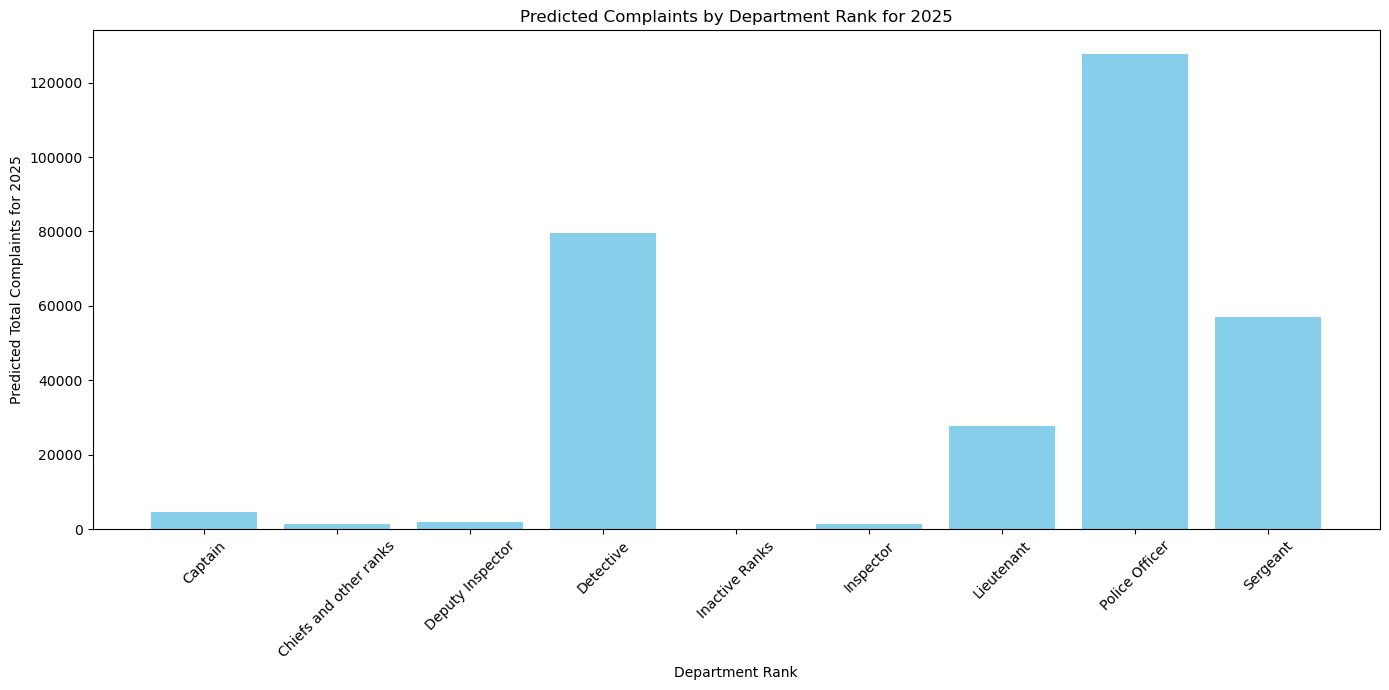

In [48]:
# Data preparation for visualization
ranks = list(future_complaints_predictions.keys())
predicted_complaints = list(future_complaints_predictions.values())

plt.figure(figsize=(14, 7))
plt.bar(ranks, predicted_complaints, color='skyblue')
plt.xlabel('Department Rank')
plt.ylabel('Predicted Total Complaints for 2025')
plt.title('Predicted Complaints by Department Rank for 2025')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()